<a href="https://colab.research.google.com/github/Fabchirajoul/SDG/blob/main/SDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the neccessary Libraried

In [1]:
# import streamlit as st
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from IPython.display import display, Markdown
import torch
import plotly.express as px
import pandas as pd
from nltk.tokenize import sent_tokenize
import nltk
import regex as re

# Download NLTK tokenizer data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Invoking the SDG Pre-trained model

In [2]:
# Model name or path to model
checkpoint = "sadickam/sdg-classification-bert"
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Load the model

In [3]:
def load_model():
    return AutoModelForSequenceClassification.from_pretrained(checkpoint)

## Load the SDG Text File

In [4]:
# Loding SDG0NE

file_path = "/content/SDG01.txt"


# Load the content of the file
with open(file_path, "r") as file:
    text_content = file.read()


# Loding SDGTWO

file_path2 = "/content/SDG02.txt"


# Load the content of the file
with open(file_path2, "r") as file2:
    text_content2 = file2.read()


# Loding SDGFOUR

file_path4 = "/content/SDG04.txt"


# Load the content of the file
with open(file_path4, "r") as file4:
    text_content4 = file4.read()


# Loding SDGFIVE

file_path5 = "/content/SDG05.txt"
# Load the content of the file
with open(file_path5, "r") as file5:
    text_content5 = file5.read()

# Loding SDGSIX

file_path6 = "/content/SDG06.txt"
# Load the content of the file
with open(file_path6, "r") as file6:
    text_content6 = file6.read()

# Loding SDGSEVEN

file_path7 = "/content/SDG07.txt"
# Load the content of the file
with open(file_path7, "r") as file7:
    text_content7 = file7.read()

# Loding SDGEIGHT

file_path8 = "/content/SDG08.txt"
# Load the content of the file
with open(file_path8, "r") as file8:
    text_content8 = file8.read()

# Loding SDGNINE

file_path9 = "/content/SDG09.txt"
# Load the content of the file
with open(file_path9, "r") as file9:
    text_content9 = file9.read()


# Loding SDGTEN

file_path10 = "/content/SDG10.txt"
# Load the content of the file
with open(file_path10, "r") as file10:
    text_content10 = file10.read()

# Loding SDGELEVEN

file_path11 = "/content/SDG11.txt"
# Load the content of the file
with open(file_path11, "r") as file11:
    text_content11 = file11.read()

# Loding SDGTWELVE

file_path12 = "/content/SDG12.txt"
# Load the content of the file
with open(file_path12, "r") as file12:
    text_content12 = file12.read()


# Loding SDGTHIRTEEN

file_path13 = "/content/SDG13.txt"
# Load the content of the file
with open(file_path13, "r") as file13:
    text_content13 = file13.read()


# Loding SDGFOURTEEN

file_path14 = "/content/SDG14.txt"
# Load the content of the file
with open(file_path14, "r") as file14:
    text_content14 = file14.read()

# Loding SDGFIFTEEN

file_path15 = "/content/SDG15.txt"
# Load the content of the file
with open(file_path15, "r") as file15:
    text_content15 = file15.read()


# Loding SDGSIXTEEN

file_path16 = "/content/SDG16.txt"
# Load the content of the file
with open(file_path16, "r") as file16:
    text_content16 = file16.read()






## Load the Tokenizer

In [5]:
def load_tokenizer():
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)
    return tokenizer

## Passing the Text file to the tokenizer

In [6]:
# tokenize pre-processed SDG01
tokenizer_ = load_tokenizer()
tokenized_text = tokenizer_(text_content, return_tensors="pt", truncation=True, max_length=len(text_content))


# tokenize pre-processed SDG02

# Truncating to 512 because the SDG bert model for sequence classification takes just 512. I still need to research on the bert model that takes the eentire length of the token
tokenizer_2 = load_tokenizer()
tokenized_text2 = tokenizer_2(text_content2[:512], return_tensors="pt", truncation=True)


# # tokenize pre-processed SDG03

# tokenizer_3 = load_tokenizer()
# tokenized_text3 = tokenizer_3(text_content3[:512], return_tensors="pt", truncation=True)

# tokenize pre-processed SDG04

tokenizer_4 = load_tokenizer()
tokenized_text4 = tokenizer_4(text_content4[:512], return_tensors="pt", truncation=True)




# tokenize pre-processed SDG05

tokenizer_5 = load_tokenizer()
tokenized_text5 = tokenizer_5(text_content5[:512], return_tensors="pt", truncation=True)



# tokenize pre-processed SDG06

tokenizer_6 = load_tokenizer()
tokenized_text6 = tokenizer_6(text_content6[:512], return_tensors="pt", truncation=True)




# tokenize pre-processed SDG07

tokenizer_7 = load_tokenizer()
tokenized_text7 = tokenizer_7(text_content7[:512], return_tensors="pt", truncation=True)



# tokenize pre-processed SDG08

tokenizer_8 = load_tokenizer()
tokenized_text8 = tokenizer_8(text_content8[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG09

tokenizer_9 = load_tokenizer()
tokenized_text9 = tokenizer_9(text_content9[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG10

tokenizer_10 = load_tokenizer()
tokenized_text10 = tokenizer_10(text_content10[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG11

tokenizer_11 = load_tokenizer()
tokenized_text11 = tokenizer_11(text_content11[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG12

tokenizer_12 = load_tokenizer()
tokenized_text12 = tokenizer_12(text_content12[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG13

tokenizer_13 = load_tokenizer()
tokenized_text13 = tokenizer_13(text_content13[:512], return_tensors="pt", truncation=True)


# tokenize pre-processed SDG14

tokenizer_14 = load_tokenizer()
tokenized_text14 = tokenizer_14(text_content14[:512], return_tensors="pt", truncation=True)



# tokenize pre-processed SDG15

tokenizer_15 = load_tokenizer()
tokenized_text15 = tokenizer_15(text_content15[:512], return_tensors="pt", truncation=True)



# tokenize pre-processed SDG16

tokenizer_16 = load_tokenizer()
tokenized_text16 = tokenizer_16(text_content16[:512], return_tensors="pt", truncation=True)





## SDG LIST

In [7]:
# SDG labels list
label_list = [
    'GOAL 1: No Poverty',
    'GOAL 2: Zero Hunger',
    'GOAL 3: Good Health and Well-being',
    'GOAL 4: Quality Education',
    'GOAL 5: Gender Equality',
    'GOAL 6: Clean Water and Sanitation',
    'GOAL 7: Affordable and Clean Energy',
    'GOAL 8: Decent Work and Economic Growth',
    'GOAL 9: Industry, Innovation and Infrastructure',
    'GOAL 10: Reduced Inequality',
    'GOAL 11: Sustainable Cities and Communities',
    'GOAL 12: Responsible Consumption and Production',
    'GOAL 13: Climate Action',
    'GOAL 14: Life Below Water',
    'GOAL 15: Life on Land',
    'GOAL 16: Peace, Justice and Strong Institutions'
]

## The model

In [8]:
# Predict text for SDG01
model = load_model()

# Predict text for SDG02
model2 = load_model()

# # Predict text for SDG03
# model3 = load_model()

# Predict text for SDG04
model4 = load_model()

# Predict text for SDG05
model5 = load_model()

# Predict text for SDG06
model6 = load_model()

# Predict text for SDG07
model7 = load_model()

# Predict text for SDG08
model8 = load_model()

# Predict text for SDG09
model9 = load_model()

# Predict text for SDG10
model10 = load_model()

# Predict text for SDG11
model11 = load_model()

# Predict text for SDG12
model12 = load_model()

# Predict text for SDG13
model13 = load_model()

# Predict text for SDG14
model14 = load_model()

# Predict text for SDG15
model15 = load_model()

# Predict text for SDG16
model16 = load_model()

In [9]:
# Predict text for SDG01
text_logits = model(**tokenized_text).logits
predictions = torch.softmax(text_logits, dim=1).tolist()[0]
predictions = [round(a, 3) for a in predictions]



# Predict text for SDG02
text_logits2 = model2(**tokenized_text2).logits
predictions2 = torch.softmax(text_logits2, dim=1).tolist()[0]
predictions2 = [round(a, 3) for a in predictions2]


# Predict text for SDG03

#  There is no file for SDG03



# Predict text for SDG04
text_logits4 = model4(**tokenized_text4).logits
predictions4 = torch.softmax(text_logits4, dim=1).tolist()[0]
predictions4 = [round(a, 3) for a in predictions4]



# Predict text for SDG05
text_logits5 = model5(**tokenized_text5).logits
predictions5 = torch.softmax(text_logits5, dim=1).tolist()[0]
predictions5 = [round(a, 3) for a in predictions5]




# Predict text for SDG06
text_logits6 = model6(**tokenized_text6).logits
predictions6 = torch.softmax(text_logits6, dim=1).tolist()[0]
predictions6 = [round(a, 3) for a in predictions6]



# Predict text for SDG07
text_logits7 = model7(**tokenized_text7).logits
predictions7 = torch.softmax(text_logits7, dim=1).tolist()[0]
predictions7 = [round(a, 3) for a in predictions7]



# Predict text for SDG08
text_logits8 = model8(**tokenized_text8).logits
predictions8 = torch.softmax(text_logits8, dim=1).tolist()[0]
predictions8 = [round(a, 3) for a in predictions8]




# Predict text for SDG09
text_logits9 = model9(**tokenized_text9).logits
predictions9 = torch.softmax(text_logits9, dim=1).tolist()[0]
predictions9 = [round(a, 3) for a in predictions9]




# Predict text for SDG10
text_logits10 = model10(**tokenized_text10).logits
predictions10 = torch.softmax(text_logits10, dim=1).tolist()[0]
predictions10 = [round(a, 3) for a in predictions10]


# Predict text for SDG11
text_logits11 = model11(**tokenized_text11).logits
predictions11 = torch.softmax(text_logits11, dim=1).tolist()[0]
predictions11 = [round(a, 3) for a in predictions11]




# Predict text for SDG12
text_logits12 = model12(**tokenized_text12).logits
predictions12 = torch.softmax(text_logits12, dim=1).tolist()[0]
predictions12 = [round(a, 3) for a in predictions12]




# Predict text for SDG13
text_logits13 = model13(**tokenized_text13).logits
predictions13 = torch.softmax(text_logits13, dim=1).tolist()[0]
predictions13 = [round(a, 3) for a in predictions13]




# Predict text for SDG14
text_logits14 = model14(**tokenized_text14).logits
predictions14 = torch.softmax(text_logits14, dim=1).tolist()[0]
predictions14 = [round(a, 3) for a in predictions14]




# Predict text for SDG15
text_logits15 = model14(**tokenized_text15).logits
predictions15 = torch.softmax(text_logits15, dim=1).tolist()[0]
predictions15 = [round(a, 3) for a in predictions15]




# Predict text for SDG16
text_logits16 = model16(**tokenized_text16).logits
predictions16 = torch.softmax(text_logits16, dim=1).tolist()[0]
predictions16 = [round(a, 3) for a in predictions16]

In [10]:
# Dictionary with label as key and percentage as value
pred_dict = (dict(zip(label_list, predictions)))
pred_dict2 = (dict(zip(label_list, predictions2)))
pred_dict4 = (dict(zip(label_list, predictions4)))


pred_dict5 = (dict(zip(label_list, predictions5)))
pred_dict6 = (dict(zip(label_list, predictions6)))
pred_dict7 = (dict(zip(label_list, predictions7)))
pred_dict8 = (dict(zip(label_list, predictions8)))
pred_dict9 = (dict(zip(label_list, predictions9)))
pred_dict10 = (dict(zip(label_list, predictions10)))
pred_dict11 = (dict(zip(label_list, predictions11)))
pred_dict12 = (dict(zip(label_list, predictions12)))
pred_dict13 = (dict(zip(label_list, predictions13)))
pred_dict14 = (dict(zip(label_list, predictions14)))
pred_dict15 = (dict(zip(label_list, predictions15)))
pred_dict16 = (dict(zip(label_list, predictions16)))



In [11]:
# Print predictions in the notebook
display(Markdown("##### Prediction outcome"))
display(Markdown(""))

# Display predictions as a DataFrame
df1 = pd.DataFrame(pred_dict.items(), columns=["SDG COMPONENTS", "Likelihood"])
df2 = pd.DataFrame(pred_dict2.items(), columns=["SDG COMPONENTS", "Likelihood"])
df4 = pd.DataFrame(pred_dict4.items(), columns=["SDG COMPONENTS", "Likelihood"])


df5 = pd.DataFrame(pred_dict5.items(), columns=["SDG COMPONENTS", "Likelihood"])
df6 = pd.DataFrame(pred_dict6.items(), columns=["SDG COMPONENTS", "Likelihood"])
df7 = pd.DataFrame(pred_dict7.items(), columns=["SDG COMPONENTS", "Likelihood"])
df8 = pd.DataFrame(pred_dict8.items(), columns=["SDG COMPONENTS", "Likelihood"])
df9 = pd.DataFrame(pred_dict9.items(), columns=["SDG COMPONENTS", "Likelihood"])
df10 = pd.DataFrame(pred_dict10.items(), columns=["SDG COMPONENTS", "Likelihood"])
df11 = pd.DataFrame(pred_dict11.items(), columns=["SDG COMPONENTS", "Likelihood"])
df12 = pd.DataFrame(pred_dict12.items(), columns=["SDG COMPONENTS", "Likelihood"])
df13 = pd.DataFrame(pred_dict13.items(), columns=["SDG COMPONENTS", "Likelihood"])
df14 = pd.DataFrame(pred_dict14.items(), columns=["SDG COMPONENTS", "Likelihood"])
df15 = pd.DataFrame(pred_dict15.items(), columns=["SDG COMPONENTS", "Likelihood"])
df16 = pd.DataFrame(pred_dict16.items(), columns=["SDG COMPONENTS", "Likelihood"])

##### Prediction outcome

In [12]:
# Concatenate the dataframes along the columns axis
combined_df = pd.concat([df1.set_index('SDG COMPONENTS'),
                         df2.set_index('SDG COMPONENTS'),
                         df4.set_index('SDG COMPONENTS'),

                         df5.set_index('SDG COMPONENTS'),
                         df6.set_index('SDG COMPONENTS'),
                         df7.set_index('SDG COMPONENTS'),
                         df8.set_index('SDG COMPONENTS'),
                         df9.set_index('SDG COMPONENTS'),
                         df10.set_index('SDG COMPONENTS'),
                         df11.set_index('SDG COMPONENTS'),
                         df12.set_index('SDG COMPONENTS'),
                         df13.set_index('SDG COMPONENTS'),
                         df14.set_index('SDG COMPONENTS'),
                         df15.set_index('SDG COMPONENTS'),
                         df16.set_index('SDG COMPONENTS')
                         ], axis=1, keys=['SDG01',
                                          'SDG02',
                                          'SDG04',
                                          'SDG05',
                                          'SDG06',
                                          'SDG07',
                                          'SDG08',
                                          'SDG09',
                                          'SDG10',
                                          'SDG11',
                                          'SDG12',
                                          'SDG13',
                                          'SDG14',
                                          'SDG15',
                                          'SDG16',])

# Display the combined dataframe
# display(combined_df)


In [13]:
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

# Create a function to return the color corresponding to the SDG with the highest probability
def color_func(value):
    max_index = np.argmax(value)
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'gray', 'brown', 'pink', 'olive', 'lightblue', 'lime', 'teal', 'navy']
    return 'color: %s' % colors[max_index]

# Create the heatmap with the custom coloring
heatmap = (combined_df*100).style.applymap(color_func).format("{:.2f}")

# Define the title label
title_label = "Probability of the different SDG Text Files with the 16 SDG Components"

# Wrap the heatmap in an HTML table with border lines and a title label
html = f'<table style="max-width: 200px; border: 1px solid black; margin: 0 auto;">' \
       f'<caption style="text-align: center; font-weight: bold; font-size: large; white-space: nowrap;" br><br>{title_label}</br></caption>' \
       f'{heatmap.render()}' \
       f'</table>'  # Adjust the max-width and other styles as needed

# Display the heatmap within a table with a title label
display(HTML(html))


<ipython-input-13-d24d8e8ff4ef>:20: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  f'{heatmap.render()}' \


,SDG01,SDG02,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16
,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood,Likelihood
SDG COMPONENTS,,,,,,,,,,,,,,,
GOAL 1: No Poverty,88.70,0.00,0.00,0.00,0.10,0.00,2.20,0.00,0.50,0.10,0.10,0.10,0.00,0.00,0.00
GOAL 2: Zero Hunger,0.60,2.80,0.00,0.00,0.10,0.00,0.10,0.10,0.00,0.30,0.20,0.20,0.10,1.00,0.00
GOAL 3: Good Health and Well-being,0.00,0.10,0.10,0.10,0.10,0.00,0.00,0.00,0.00,0.60,0.10,0.00,0.00,0.00,0.00
GOAL 4: Quality Education,0.00,0.00,9.60,0.00,0.00,0.00,0.10,0.30,0.00,0.20,0.20,0.10,0.00,0.00,0.00
GOAL 5: Gender Equality,0.00,0.10,0.10,98.20,0.10,0.00,0.10,0.00,0.10,0.10,0.20,0.00,0.00,0.10,0.00
GOAL 6: Clean Water and Sanitation,0.00,0.50,0.10,0.00,87.30,0.00,0.00,0.10,0.00,0.30,0.30,0.10,0.10,0.30,0.00
GOAL 7: Affordable and Clean Energy,0.00,0.10,0.00,0.00,0.40,99.40,0.10,0.20,0.00,4.90,30.50,4.10,0.00,0.00,0.00
GOAL 8: Decent Work and Economic Growth,0.50,0.00,0.00,0.00,0.00,0.00,24.10,0.10,1.60,0.20,0.20,0.10,0.00,0.00,0.00


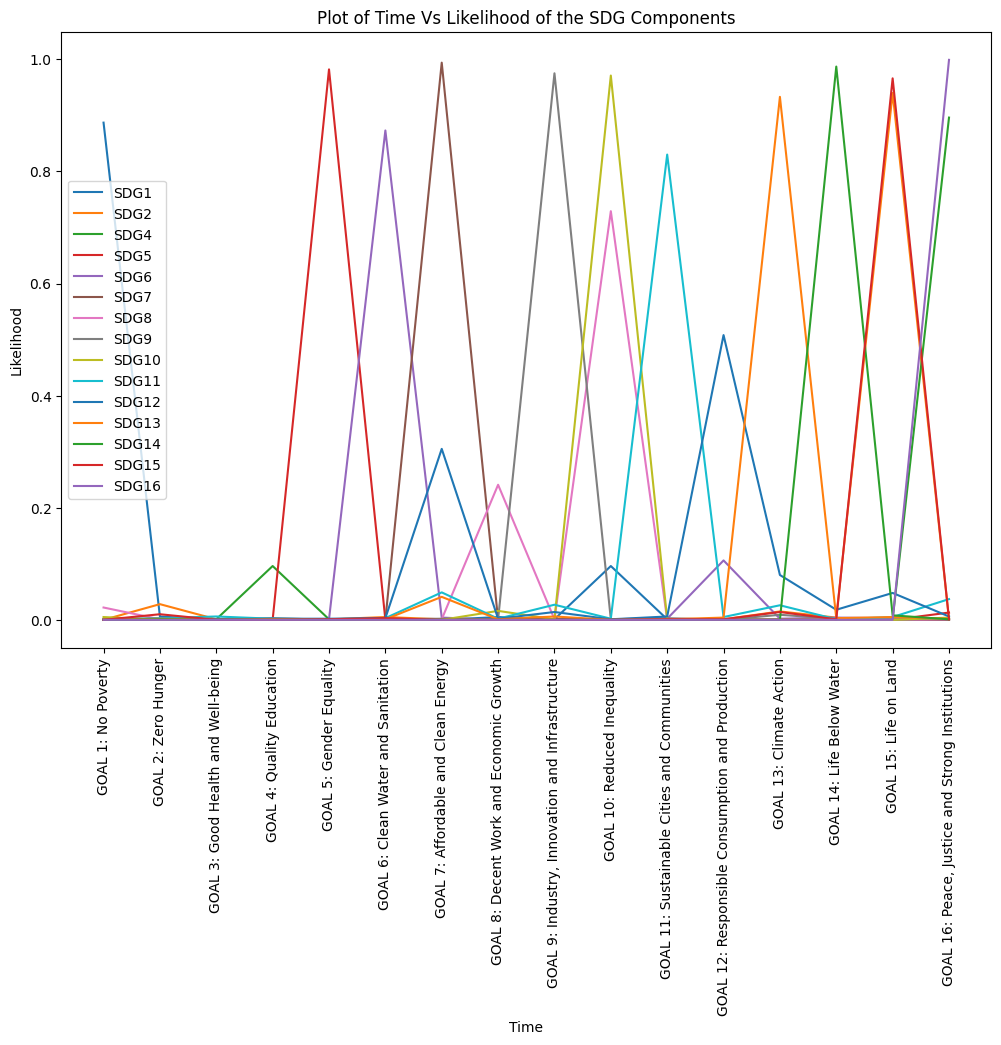

In [14]:
import matplotlib.pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(combined_df['SDG01'], label='SDG1')
plt.plot(combined_df['SDG02'], label='SDG2')
plt.plot(combined_df['SDG04'], label='SDG4')
plt.plot(combined_df['SDG05'], label='SDG5')
plt.plot(combined_df['SDG06'], label='SDG6')
plt.plot(combined_df['SDG07'], label='SDG7')
plt.plot(combined_df['SDG08'], label='SDG8')
plt.plot(combined_df['SDG09'], label='SDG9')
plt.plot(combined_df['SDG10'], label='SDG10')
plt.plot(combined_df['SDG11'], label='SDG11')
plt.plot(combined_df['SDG12'], label='SDG12')
plt.plot(combined_df['SDG13'], label='SDG13')
plt.plot(combined_df['SDG14'], label='SDG14')
plt.plot(combined_df['SDG15'], label='SDG15')
plt.plot(combined_df['SDG16'], label='SDG16')

plt.xlabel('Time')
plt.ylabel('Likelihood')
plt.title('Plot of Time Vs Likelihood of the SDG Components')

# Rotate x labels vertically
plt.xticks(rotation=90)

plt.legend()

# Show the plot
plt.show()



## Corellation between the SDGS

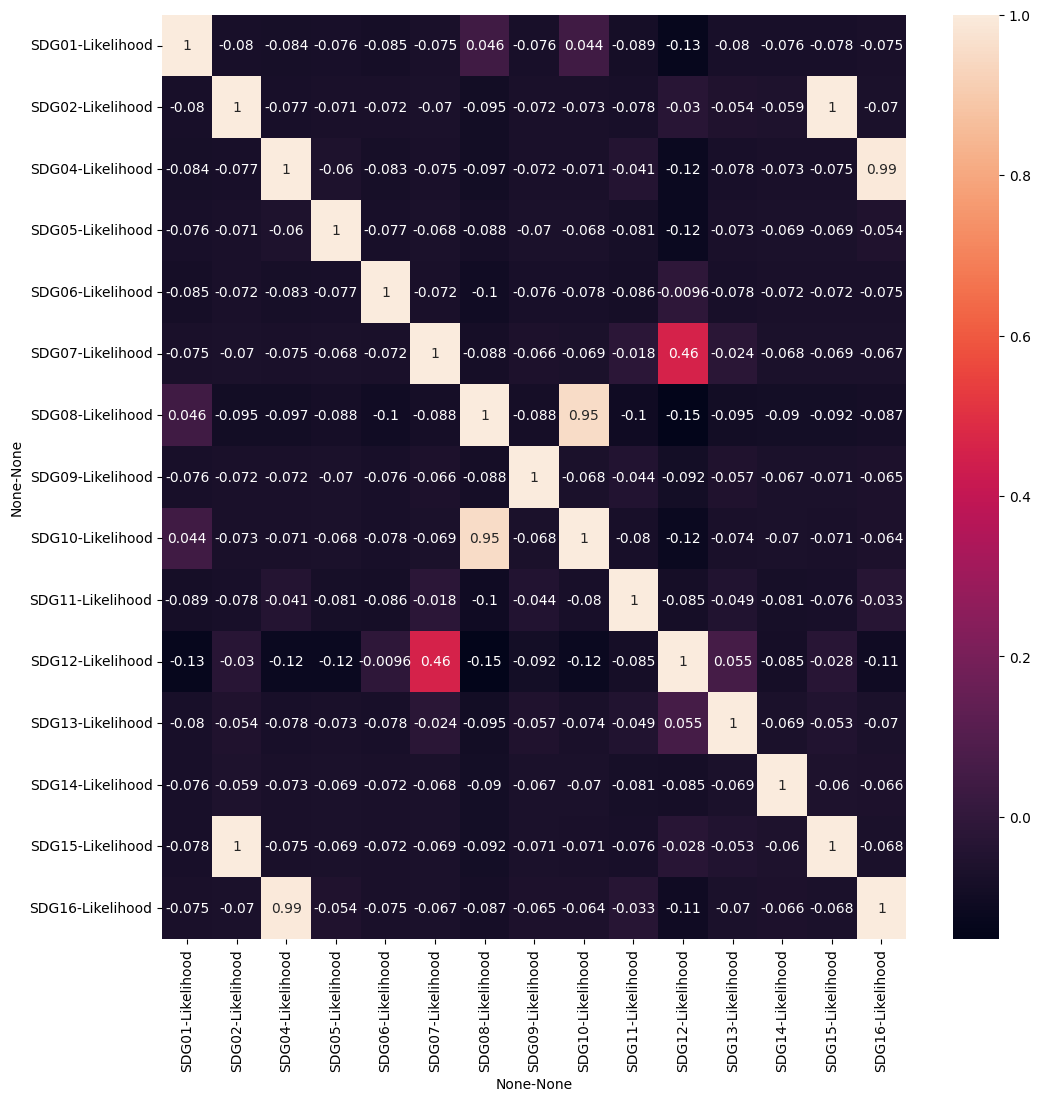

In [15]:
import matplotlib.pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(12, 12))

# Create the heatmap
sns.heatmap(combined_df[['SDG01', 'SDG02', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16']].corr(), annot=True)

# Show the plot
plt.show()